## Download speeches for a sample senator

In [1]:
import urllib.request
import xml.etree.ElementTree as ET
import csv
import re
import sys
import matplotlib.pyplot as plt

TAG_RE = re.compile(r'<[^>]+>')
SPACE_RE = re.compile('&nbsp;')

In [2]:
SENATOR_ID = 3398
MAX_SPEECHES = 10
f = urllib.request.urlopen("http://legis.senado.leg.br/dadosabertos/senador/"+ str(SENATOR_ID) +"/discursos")
raw = f.read()
root = ET.fromstring(raw)

print("Downloading speeches ")
parlamentar = root.find('Parlamentar')
i = 0
alltexts = ''
with open("output/senator-speeches.csv", "w", encoding='utf-8') as ofile:
    writer = csv.writer(ofile, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)
    id = parlamentar.find("IdentificacaoParlamentar")
    for pr in parlamentar.find("Pronunciamentos").iter('Pronunciamento'):
        i = i + 1
        try:
    #         http://www25.senado.leg.br/web/atividade/pronunciamentos/-/p/texto/427686
            urlTexto = pr.find('UrlTexto').text
            f = urllib.request.urlopen(urlTexto)
            html = f.read().decode('utf-8')
    #         print('>>>' + html)

            html_frag = re.search('texto-integral">(.*)<div class="FooterMain"', html)
            if html_frag != None:
                text = TAG_RE.sub('', html_frag.group(1))
                text = SPACE_RE.sub('', text)
        #         print(text)

                row = [ id.find('CodigoParlamentar').text,
                        id.find('NomeParlamentar').text,
                        id.find('SexoParlamentar').text,
                        pr.find('SiglaTipoPronunciamento').text,
                        pr.find('DataPronunciamento').text,
                        pr.find('SiglaPartidoParlamentarNaData').text,
                        pr.find('UfParlamentarNaData').text,
                        pr.find('NomeCasaPronunciamento').text,
                        text,
                      ]
                writer.writerow(row)
        #         print('>>>> ' + text)
                alltexts = alltexts + '\n' + text
        #         print("speech " + row[1] + " " + row[4])
                sys.stdout.write('.')
            else:
                print("Unavailable " + urlTexto)

            if i > MAX_SPEECHES:
                break
        except:
            if i > MAX_SPEECHES:
                break
            

print("Done")

...........Done


## Simple Word Cloud

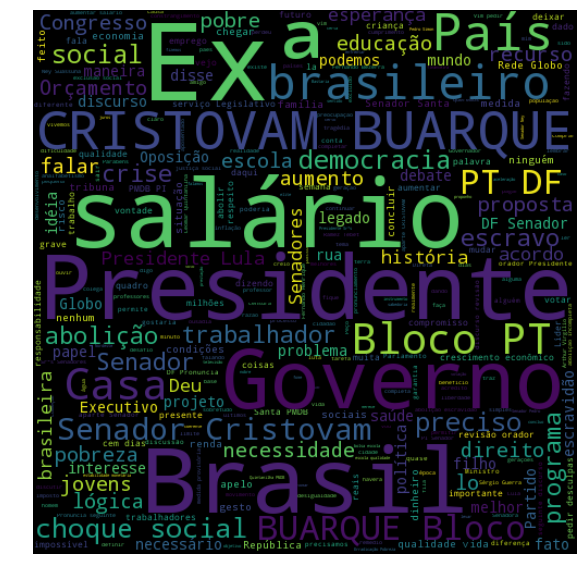

In [17]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8'))
# print(stopwords)

# Generate a word cloud image
wc = WordCloud(background_color="black", max_words=300,
               stopwords=stopwords, max_font_size=100, random_state=42,
               width=500, height=500)

wordcloud = wc.generate(alltexts)
plt.figure(figsize=(20,10))
# plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Exploring advanced text techniques

### Stemming

In [87]:
import nltk
from nltk import stem
import re
from string import punctuation
print('download punkt')
nltk.download('punkt')
print('download rslp')
nltk.download('rslp')
# print('download stopwords')
# nltk.download("stopwords")
# nltk.download('floresta')
# nltk.download('machado')
stemmer = stem.RSLPStemmer()
# nltk.download('mac_morpho')

download punkt
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
download rslp
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [109]:
print('Removing non alpha characters')
text1 = re.sub('[^a-zØ-öø-ÿ ]', '', alltexts.lower())
# text1 = alltexts.lower().translate(punctuation)
# text1 = alltexts.strip('.').lower()
# text1 = alltexts.lower()
# text1 = alltexts

print('tokenizing words')
# words1 = nltk.word_tokenize(text1, language='portuguese')
words1 = text1.split(' ')
# print(words1[:10])
print(len(words1))

print('removing stopwords')
# fdist = nltk.FreqDist(words1)
# stopwords = [word for word, frequency in fdist.most_common(10)]
# for word, frequency in fdist.most_common(50):
#     print('{}={}'.format(word, frequency))
# stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords = set(line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8'))
# stopwords = []
# words2 = words1
words2 = [w for w in words1 if w not in stopwords]
# words2 = [w for w in words1 if len(w) > 4]
print(len(words2))
# print(words2[:10])
# print('stemming words')
words3 = words2
# words3 = [stemmer.stem(w) for w in words2]
# print(words3[:10])

# print('removing duplicate words')
# words4 = list(set(words3))
words4 = words3
print(words4[:10])
print(len(words4))

Removing non alpha characters
tokenizing words
27139
removing stopwords
10810
['cristovam', 'buarque', 'bloco', 'socialismo', 'democraciapps', 'df', 'ordem', 'revisão', 'orador', 'presidente']
10810


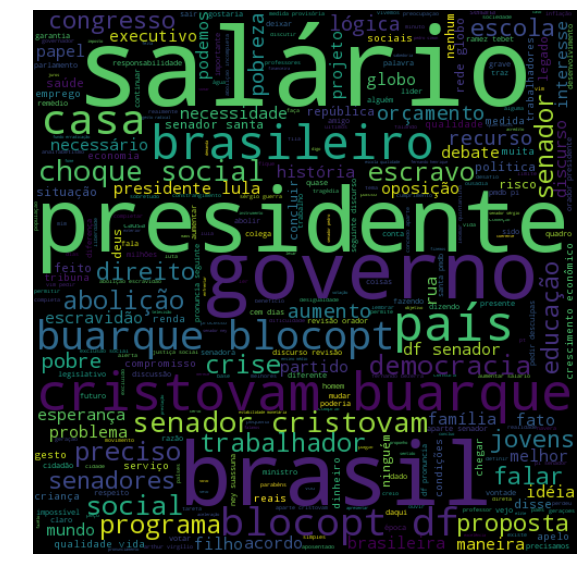

In [110]:
wc = WordCloud(background_color="black", max_words=300,
               stopwords=stopwords, max_font_size=100, random_state=42,
               width=500, height=500)

text = ''

for w in words4:
    text = text + w + ' '
wordcloud = wc.generate(text)
plt.figure(figsize=(20,10))
# plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()